In [74]:
import pandas as pd
import numpy as np
import ast
import json
from datetime import datetime
import plotly.plotly as py
import plotly.graph_objs as go


In [53]:
!pip install folium

    100% |████████████████████████████████| 92kB 1.9MB/s ta 0:00:01
  Using cached https://files.pythonhosted.org/packages/63/36/1c93318e9653f4e414a2e0c3b98fc898b4970e939afeedeee6075dd3b703/branca-0.3.1-py3-none-any.whl


In [44]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

In [45]:
df = pd.read_csv('neighfinal_listing_dataframe.csv', engine='python')
df

,address,bath,bedrooms,borough,extra,nearest_subway,neighborhood,rent,sqft,median_income,...,Upper West Side,Vinegar Hill,Washington Heights,Weeksville,West Village,Williamsburg,Windsor Terrace,Wingate,Woodside,Yorkville
0,453 Milford Street,1.0,3,Brooklyn,"['Dogs Allowed', 'Dishwasher', 'Microwave', 'C...",0.50,New Lots,2200,0,63700.0,...,0,0,0,0,0,0,0,0,0,0
1,37 King St,1.0,1,Manhattan,"['Elevator', 'Dogs Allowed', 'Dishwasher', 'Ca...",0.06,Hudson Square,4500,0,106056.0,...,0,0,0,0,0,0,0,0,0,0
2,Hudson St,2.0,2,Manhattan,[],0.18,Hudson Square,9395,0,106056.0,...,0,0,0,0,0,0,0,0,0,0
3,600 West 42nd Street,1.0,1,Manhattan,"['Elevator', 'Dogs Allowed', 'Dishwasher', 'Ca...",0.38,Hell's Kitchen,4300,0,93707.0,...,0,0,0,0,0,0,0,0,0,0
4,785 Ninth Avenue 3c,1.0,2,Manhattan,"['Brand New Renovations', 'Dogs Allowed', 'Red...",0.21,Hell's Kitchen,3199,700,93707.0,...,0,0,0,0,0,0,0,0,0,0
5,785 Ninth Avenue 3c,1.0,2,Manhattan,"['Brand New Renovations', 'Dogs Allowed', 'Red...",0.21,Hell's Kitchen,3199,700,93707.0,...,0,0,0,0,0,0,0,0,0,0
6,785 Ninth Avenue 3c,1.0,2,Manhattan,"['Brand New Renovations', 'Dogs Allowed', 'Red...",0.21,Hell's Kitchen,3199,700,93707.0,...,0,0,0,0,0,0,0,0,0,0
7,312 W 58th Street,2.0,4,Manhattan,"['No Fee', 'Laundry In Building', 'Dogs Allowe...",0.08,Hell's Kitchen,7150,1,93707.0,...,0,0,0,0,0,0,0,0,0,0
8,321 W 47th St,2.0,2,Manhattan,"['No Fee', 'Dogs Allowed', 'Dishwasher', 'Expo...",0.17,Hell's Kitchen,3500,0,93707.0,...,0,0,0,0,0,0,0,0,0,0
9,524 West 50th Street,1.0,1,Manhattan,"['Laundry In Building', 'Pre War Laundry On Ev...",0.41,Hell's Kitchen,1999,500,93707.0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
df['zipcode'] = df['zipcode'].apply(np.int64)
df['zipcode'] = df['zipcode'].apply(str)

In [63]:
from collections import Counter
count_zip = Counter(list(df.zipcode))
count_zip.most_common()

[('10005', 567),
 ('10036', 535),
 ('10016', 501),
 ('10075', 387),
 ('11101', 309),
 ('10003', 281),
 ('11206', 274),
 ('13495', 265),
 ('10001', 263),
 ('10024', 226),
 ('10002', 224),
 ('10018', 183),
 ('10022', 167),
 ('10012', 161),
 ('10013', 160),
 ('11211', 153),
 ('10014', 146),
 ('10025', 139),
 ('11201', 136),
 ('11205', 116),
 ('10023', 107),
 ('10029', 82),
 ('10280', 71),
 ('10034', 56),
 ('10026', 53),
 ('11217', 49),
 ('11226', 48),
 ('10017', 48),
 ('11238', 46),
 ('11225', 46),
 ('11385', 45),
 ('11104', 43),
 ('10031', 43),
 ('11215', 43),
 ('10033', 40),
 ('11374', 39),
 ('10027', 37),
 ('10010', 35),
 ('10044', 33),
 ('10021', 26),
 ('10007', 21),
 ('11355', 18),
 ('10040', 18),
 ('11375', 17),
 ('11209', 16),
 ('11373', 16),
 ('11230', 16),
 ('11233', 15),
 ('11220', 15),
 ('11372', 14),
 ('10004', 13),
 ('11415', 12),
 ('11231', 11),
 ('11216', 11),
 ('11204', 10),
 ('10128', 10),
 ('11377', 10),
 ('11435', 10),
 ('11203', 9),
 ('11218', 8),
 ('11412', 5),
 ('113

In [67]:
a = pd.DataFrame(data = count_zip.most_common(), index = None)
a.rename(columns={0: 'zip_code', 1: 'zip_count'}, inplace = True)
a

,zip_code,zip_count
0,10005,567
1,10036,535
2,10016,501
3,10075,387
4,11101,309
5,10003,281
6,11206,274
7,13495,265
8,10001,263
9,10024,226


In [38]:
zip_string = []
for i in list(a.index):
    zip_string.append(str(i))
    

In [29]:
with open ('nyczipcodetabulationareas.geojson', 'r') as jsonFile:
    nycmapdata = json.load(jsonFile)
test = nycmapdata
test[0]

In [39]:
zipsremove = []
for i in range(len(test['features'])):
    if test['features'][i]['properties']['postalCode'] in zip_string:
        zipsremove.append(test['features'][i])

In [42]:
zips_json = dict.fromkeys(['type', 'features'])
zips_json['type'] = 'FeatureCollection'
zips_json['features'] = zipsremove

open('updated-nyc-data.json', 'w').write(
    json.dumps(zips_json, sort_keys = True, indent = 4, separators = (',', ': '))
)

481441

In [83]:
# Initialize the map:
m = folium.Map(location=[40.7128, -74.0060], zoom_start = 11)
 
# Add the color for the chloropleth:
m.choropleth(
 geo_data=nyc_geo,
 name='choropleth',
 data=a,
 columns=['zip_code', 'zip_count'],
 key_on='feature.properties.postalCode',
 fill_color='YlOrRd',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Zip Code Distribution'
)
folium.LayerControl().add_to(m)
 
# Save to html
m.save('nycchoropleth.html')
 
m


In [86]:
count_borough = Counter(list(df.borough))
count_borough.most_common()
b = pd.DataFrame(data = count_borough.most_common(), index = None)
b.rename(columns={0: 'borough', 1: 'borough_count'}, inplace = True)
b

,borough,borough_count
0,Manhattan,4903
1,Brooklyn,1026
2,Queens,554


In [94]:
count_bedrooms = Counter(list(df.bedrooms))
count_bedrooms.most_common()
c = pd.DataFrame(data = count_bedrooms.most_common(), index=['One/Studio',2,3,4,5,6,7])
c.rename(columns={0: 'bedrooms', 1: 'bedrooms_count'}, inplace = True)
c

,bedrooms,bedrooms_count
One/Studio,1,3241
2,2,1875
3,3,991
4,4,335
5,5,35
6,6,5
7,7,1


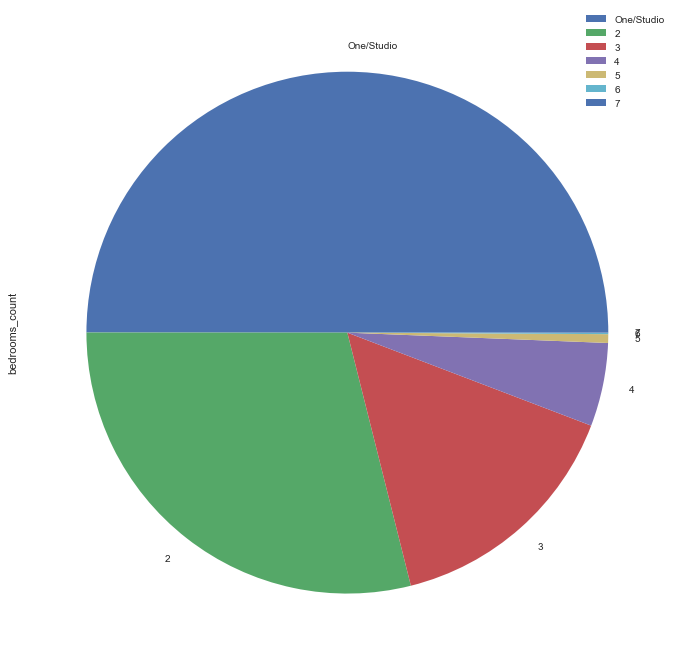

In [99]:
plot = c.plot.pie(y='bedrooms_count', figsize=(12, 12))

In [100]:
count_studio = Counter(list(df.Studio))
count_studio.most_common()
d = pd.DataFrame(data = count_studio.most_common())
d.rename(columns={0: 'studio', 1: 's_count'}, inplace = True)
d

,studio,s_count
0,0,5300
1,1,1183


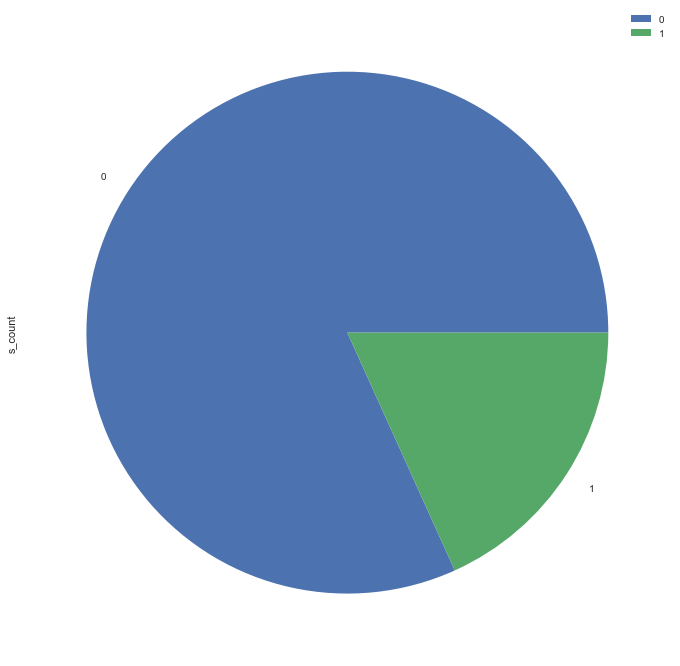

In [101]:
plot = d.plot.pie(y='s_count', figsize=(12, 12))